In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [22]:
data = pd.read_csv('data.csv')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [23]:
def build_generator(latent_dim, data_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(data_dim, activation='sigmoid'))
    return model

In [24]:
def build_discriminator(data_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [25]:
latent_dim = 100
data_dim = data_scaled.shape[1]

generator = build_generator(latent_dim, data_dim)
discriminator = build_discriminator(data_dim)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

gan = Sequential()
gan.add(generator)
gan.add(discriminator)
discriminator.trainable = False
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

In [26]:
def train_gan(gan, generator, discriminator, data, epochs=5000, batch_size=32):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        gen_data = generator.predict(noise)

        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_data, np.zeros((batch_size, 1)))

        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"{epoch}/{epochs} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]")

train_gan(gan, generator, discriminator, data_scaled)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step
1000/5000 [D loss: [0.63381857 0.5625    ]] [G loss: 0.8277634978294373]
1/1 [==============================] - 0s 34ms/step
2000/5000 [D loss: [0.67408603 0.59375   ]] [G loss: 0.762476921081543]
1/1 [==============================] - 0s 27ms/step
3000/5000 [D loss: [0.70758048 0.375     ]] [G loss: 0.6991527080535889]
1/1 [==============================] - 0s 39ms/step
4000/5000 [D loss: [0.68388143 0.578125  ]] [G loss: 0.7553789019584656]
1/1 [==============================] - 0s 32ms/step


In [27]:
noise = np.random.normal(0, 1, (1000, latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)
synthetic_data_df = pd.DataFrame(synthetic_data, columns=data.columns)

32/32 [==============================] - 0s 4ms/step


In [28]:
synthetic_data_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,42.079273,101.505806,0.493683,0.411258,8.714449e-10,1.270111e-09,0.314083,0.290872,0.382020,4.175901e-09,...,5.766993e-09,0.372989,1.238916e-09,3.149269e-09,0.655892,0.671385,132.154785,1.132749e-18,5.677212e-09,0.260858
1,66.022217,154.967850,0.469202,0.391927,2.429786e-06,1.244864e-06,0.348946,0.334353,0.397362,3.146076e-06,...,3.320573e-06,0.323306,1.429188e-06,1.386385e-06,0.560934,0.591749,76.320229,9.009959e-10,6.658677e-05,0.425137
2,21.093714,129.603348,0.417506,0.293860,1.793749e-06,1.699481e-06,0.292625,0.424751,0.515922,2.490880e-06,...,3.038982e-06,0.391287,1.388277e-06,2.950047e-06,0.420228,0.416892,34.824009,3.050494e-06,2.402531e-03,0.390664
3,84.521660,116.413986,0.483312,0.478547,3.750453e-11,5.162685e-11,0.297937,0.251171,0.309090,1.535677e-10,...,2.625616e-10,0.355733,3.993091e-11,6.347268e-11,0.740507,0.715660,174.125671,3.385462e-22,2.313348e-10,0.275041
4,36.551899,73.195335,0.446996,0.259704,4.159916e-08,5.646785e-08,0.303052,0.323940,0.346199,8.223549e-08,...,1.259407e-07,0.331152,4.186997e-08,1.058607e-07,0.604893,0.616196,122.934357,3.558133e-14,7.611517e-07,0.192661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.346962,75.368805,0.452301,0.213686,3.157611e-09,2.919917e-09,0.275681,0.271448,0.275884,1.085630e-08,...,1.147306e-08,0.308916,4.128439e-09,9.536497e-09,0.627996,0.640558,132.831436,1.713992e-17,1.962304e-08,0.155346
996,70.504272,75.785126,0.487431,0.318681,1.000411e-10,9.669018e-11,0.325767,0.275181,0.376287,2.455231e-10,...,4.643816e-10,0.385136,7.359366e-11,1.978335e-10,0.694572,0.679873,194.859924,1.579741e-21,3.333649e-10,0.172428
997,83.650238,91.401413,0.475274,0.377248,6.013692e-11,8.732665e-11,0.281084,0.235260,0.333119,1.968777e-10,...,5.258872e-10,0.323776,8.334260e-11,1.336017e-10,0.772951,0.712926,181.188660,5.077316e-22,2.322260e-10,0.205962
998,83.835106,108.489914,0.508501,0.321355,4.625460e-12,4.557832e-12,0.315320,0.262833,0.337074,1.197663e-11,...,2.351140e-11,0.359737,5.931962e-12,8.509519e-12,0.721878,0.710628,171.446976,2.844552e-24,1.472417e-11,0.269628


In [29]:
output_file_path = "dcgan.csv"
synthetic_data_df.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to dcgan.csv


(20631, 30) (1000, 30)


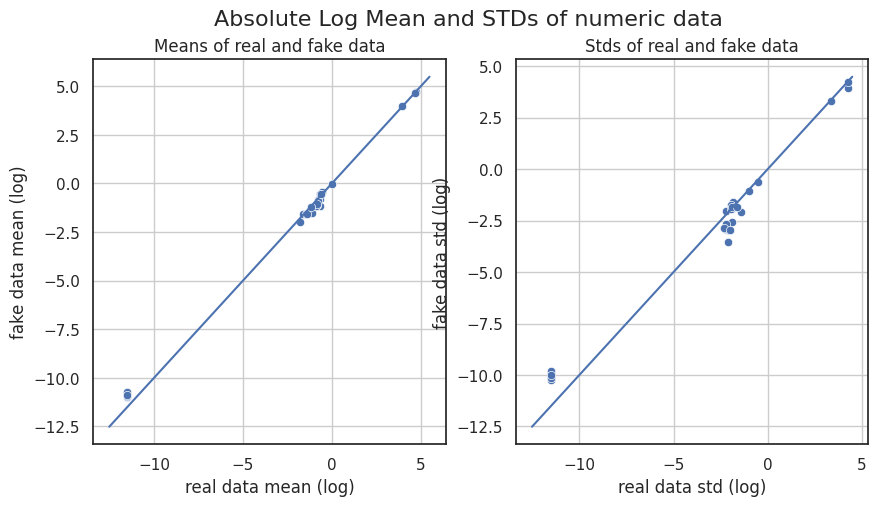

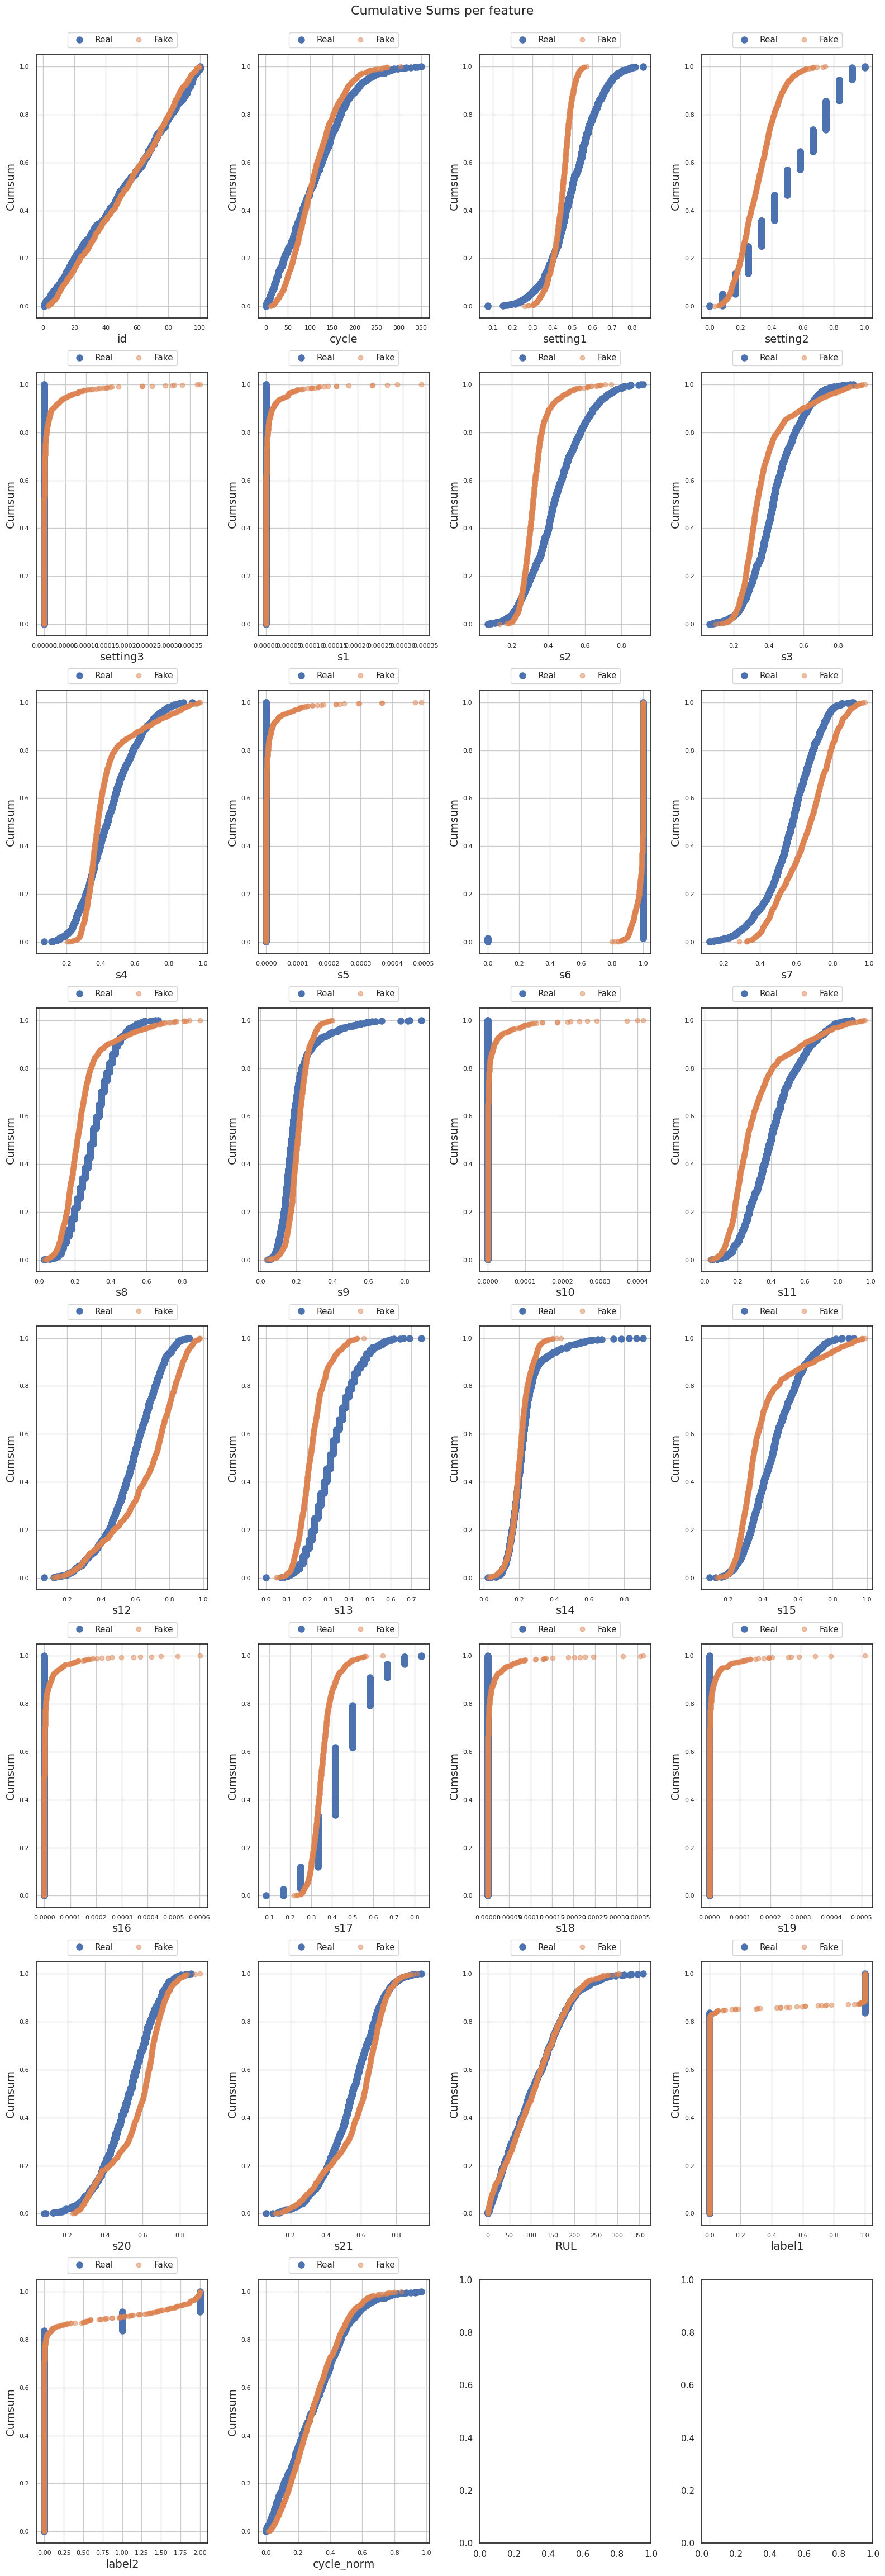

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, synthetic_data_df.shape)
table_evaluator =  TableEvaluator(data, synthetic_data_df)

table_evaluator.visual_evaluation()